<a href="https://colab.research.google.com/github/belyasminesanaeencg-droid/DS2025/blob/main/ML_project_Diabetes_health_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
alexteboul_diabetes_health_indicators_dataset_path = kagglehub.dataset_download('alexteboul/diabetes-health-indicators-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.
Data source import complete.


In [33]:
# Met à jour pip pour éviter les problèmes de dépendances
!pip install --upgrade pip

# Installer les versions compatibles et réinstaller proprement
!pip install --upgrade --force-reinstall scikit-learn imbalanced-learn


  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.5 MB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting 

In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings

# MAchine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
)
from xgboost import XGBClassifier

# model selection & tuning
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV

from scipy.stats import uniform, randint


#Evaluation metrics
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)


# Feature selection
from sklearn.feature_selection import RFE , SelectKBest, f_classif


# sampling methods

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Pipelines
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline as SklearnPipeline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv



# **LOADING THE DATA**


In [35]:
df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [36]:
#checking if there are any missing values
df.isna().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [37]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


# **MODIIFY THE DIABETES CLASSIFICATION**

The dataset "diabetes_binary_health_indicators_BRFSS2015.csv" assigns pre-diabetes as non-diabets (Diabetes_binary = 0), However, since individuals with pre-diabetes have a higher risk of developing diabetes, it is reasonable to consider pre-diabetes as diabetes in the binary classification. Hence, I created a new dataset that classifies pre-diabetes as diabetes (Diabetes_binary = 1)

In [38]:
#check the target variable of the original dataset
df['Diabetes_012'].value_counts().sort_index()


,count
Diabetes_012,
0.0,213703
1.0,4631
2.0,35346


In [39]:
# 0 is for no diabetes or onlt during pregnancy , 1 is for pre-diabetes or borderline diabetes and 2 is for yes diabetes


#Change the column name to Diabetes_binary
df = df.rename(columns = {'Diabetes_012': 'Diabetes_binary'})




df['Diabetes_binary'] =df['Diabetes_binary'].replace({2:1})# Change the diabetics 2 to a 1
# so that we have 0 meaning non-diabetic and pre-diabetic and 1 meaning diabetic.
df['Diabetes_binary'].value_counts().sort_index()


,count
Diabetes_binary,
0.0,213703
1.0,39977


****creating lists of the columns****

In [40]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [41]:
# Create two lists
# one containing the names of columns with binary variables
# and the other with the remaing columns

target = 'Diabetes_binary'

binary_col = [
    col for col in df.columns
    if df[col].nunique() == 2 and col != target
]

num_col = [
    col for col in df.columns.difference(binary_col)
    if col != target
]

print('Binary Columns: ', binary_col)
print('Numerical Columns: ', num_col)

Binary Columns:  ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Numerical Columns:  ['Age', 'BMI', 'Education', 'GenHlth', 'Income', 'MentHlth', 'PhysHlth']


# overview of the target variable


In [42]:
print(df[target].value_counts().sort_index())

print(df[target].value_counts(normalize= True).sort_index().map(lambda x: f'{x : .3%}'))

Diabetes_binary
0.0    213703
1.0     39977
Name: count, dtype: int64
Diabetes_binary
0.0     84.241%
1.0     15.759%
Name: proportion, dtype: object


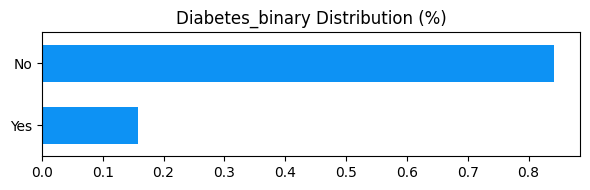

In [43]:
# Define a function to plot a bar chat of diabetes
def plot_barchart_diabetes(df, col=target):
    ratios = df[col].value_counts(normalize=True).sort_index()
    labels = ['No', 'Yes']
    colors = ['#008000' , '#C62E2E']
    y_pos = [0.75, 0.25]

    plt.figure(figsize=(6, 2))
    plt.barh(y_pos, ratios, height=0.3, color='#0D92F4')
    plt.yticks(y_pos, labels)
    plt.title(f'{col} Distribution (%)')

    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

# Diplay the distribution of Diabetes_binary as a bar chart
plot_barchart_diabetes(df)



# overview of Binary values

In [44]:
for col in binary_col:
    print(df[col].value_counts(sort = False).sort_index())
    print()


HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64

HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64

CholCheck
0.0      9470
1.0    244210
Name: count, dtype: int64

Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64

Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

PhysActivity
0.0     61760
1.0    191920
Name: count, dtype: int64

Fruits
0.0     92782
1.0    160898
Name: count, dtype: int64

Veggies
0.0     47839
1.0    205841
Name: count, dtype: int64

HvyAlcoholConsump
0.0    239424
1.0     14256
Name: count, dtype: int64

AnyHealthcare
0.0     12417
1.0    241263
Name: count, dtype: int64

NoDocbcCost
0.0    232326
1.0     21354
Name: count, dtype: int64

DiffWalk
0.0    211005
1.0     42675
Name: count, dtype: int64

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64



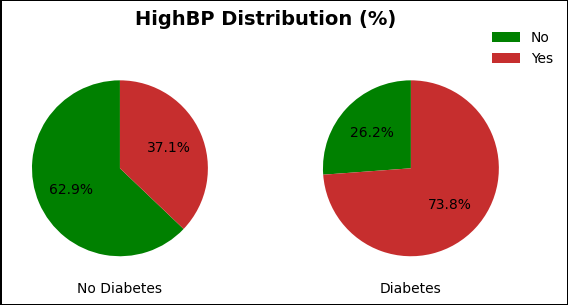

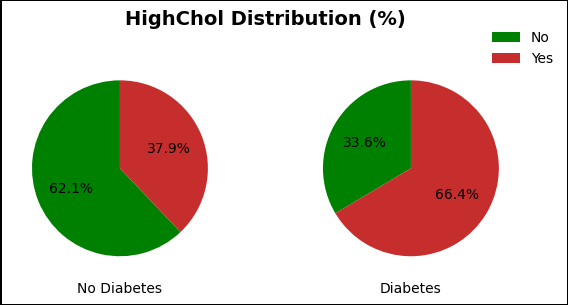

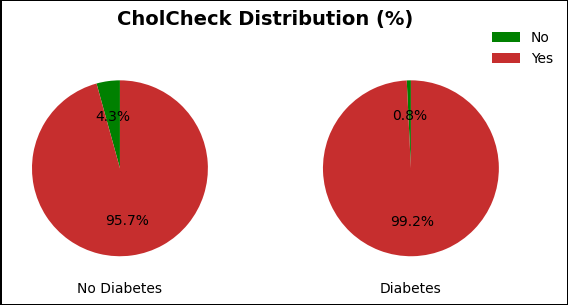

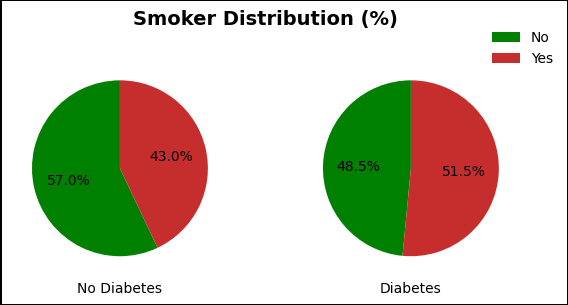

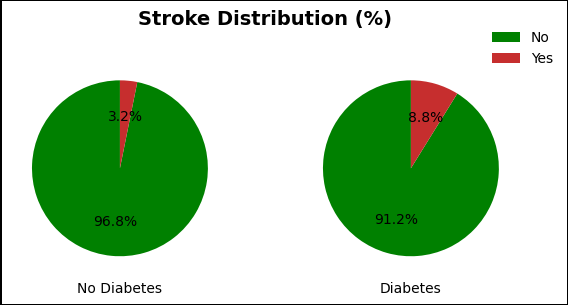

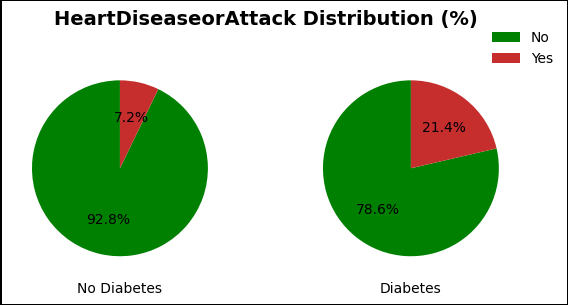

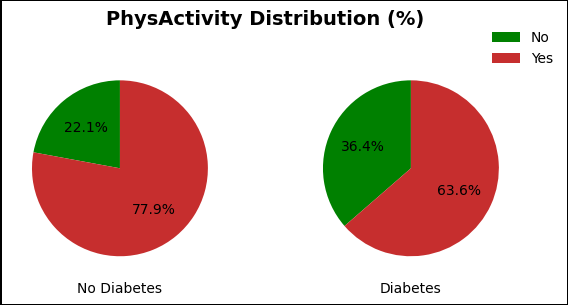

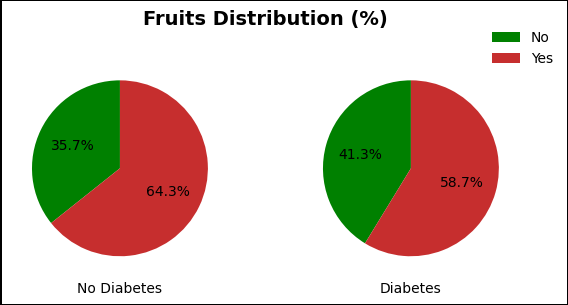

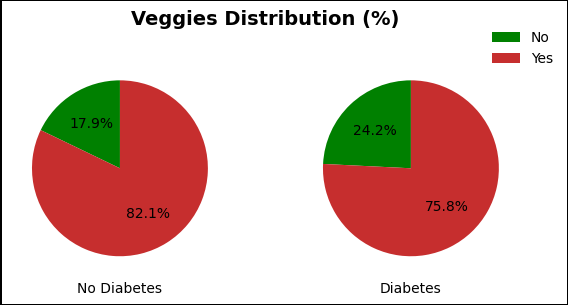

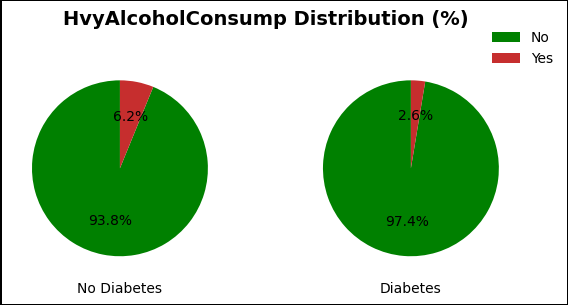

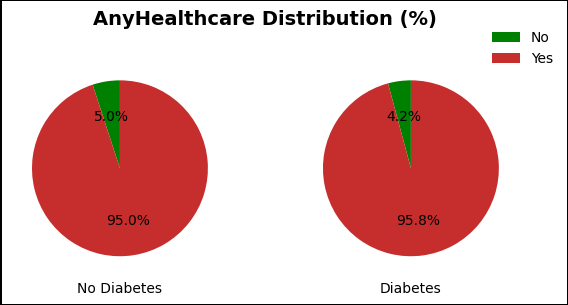

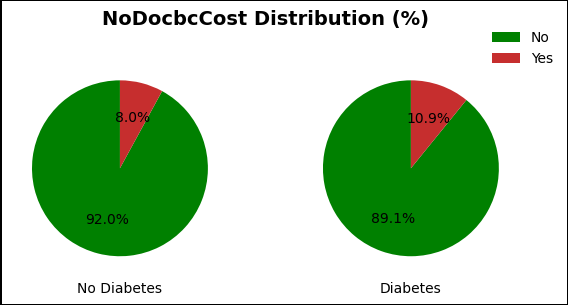

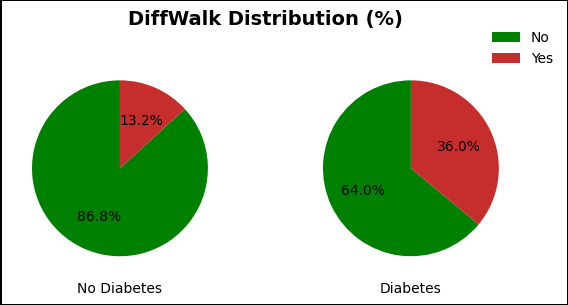

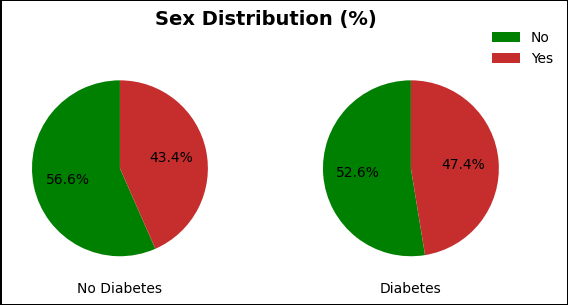

In [45]:

# Define function for creating a pie chart for binary variables

def binary_var_pie(var):

    # Group the data
    grouped = df.groupby([target, var]).size().unstack()

    # Label the binary variable to blue if No, red if Yes
    labels = ['No', 'Yes']
    colors = ['#008000' , '#C62E2E']

    # Create space (1 row * 2 columns) for pie charts
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))

    # Pie chart for no diabetes
    axes[0].pie(grouped.iloc[0], colors=colors, autopct='%.1f%%', startangle=90)
    axes[0].set_xlabel('No Diabetes', fontsize=10, labelpad=2)

    # Pie chart for diabetes
    axes[1].pie(grouped.iloc[1], colors=colors, autopct='%.1f%%', startangle=90)
    axes[1].set_xlabel('Diabetes', fontsize=10, labelpad=2)

    # Add a main title
    plt.suptitle(f'{var} Distribution (%)', fontsize=14, fontweight='bold')

    # Create a legend elements
    legend_elements = [
        Patch(facecolor=colors[0], label=labels[0]),
        Patch(facecolor=colors[1], label=labels[1])
    ]

    # Add a legend
    fig.legend(
        handles=legend_elements,
        loc='upper right',
        bbox_to_anchor=(1, 0.95),
        frameon=False
    )

    # Add a box around the entire figure
    fig.patch.set_edgecolor('black')
    fig.patch.set_linewidth(1)

    plt.tight_layout(pad=1.3)
    plt.show()

# Create the pie charts
for col in binary_col:
    binary_var_pie(col)


# overview of numerical variables

In [46]:
print(f'Number of unique values:')
print(df[num_col].nunique())



Number of unique values:
Age          13
BMI          84
Education     6
GenHlth       5
Income        8
MentHlth     31
PhysHlth     31
dtype: int64


In [47]:
# Overview of the numerical variables (2): Mean values for No Diabetes and Diabetes Groups
for col in num_col:
    print(f'<Mean values of {col}>')
    print(df.groupby(target)[col].mean())
    print()



<Mean values of Age>
Diabetes_binary
0.0    7.786559
1.0    9.344798
Name: Age, dtype: float64

<Mean values of BMI>
Diabetes_binary
0.0    27.742521
1.0    31.802737
Name: BMI, dtype: float64

<Mean values of Education>
Diabetes_binary
0.0    5.106629
1.0    4.750031
Name: Education, dtype: float64

<Mean values of GenHlth>
Diabetes_binary
0.0    2.372391
1.0    3.254446
Name: GenHlth, dtype: float64

<Mean values of Income>
Diabetes_binary
0.0    6.208663
1.0    5.226430
Name: Income, dtype: float64

<Mean values of MentHlth>
Diabetes_binary
0.0    2.944404
1.0    4.469695
Name: MentHlth, dtype: float64

<Mean values of PhysHlth>
Diabetes_binary
0.0    3.582416
1.0    7.768417
Name: PhysHlth, dtype: float64



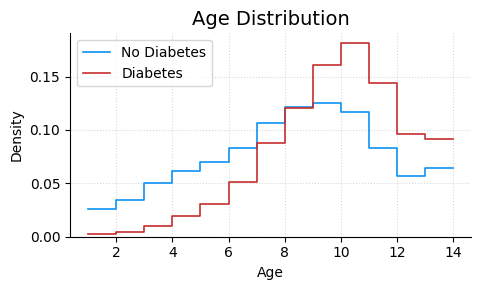

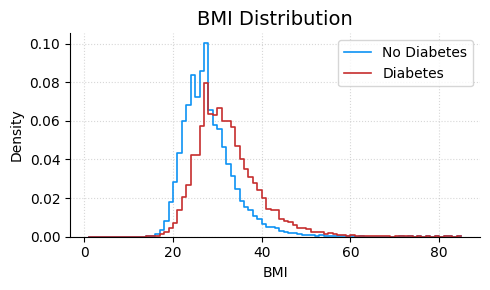

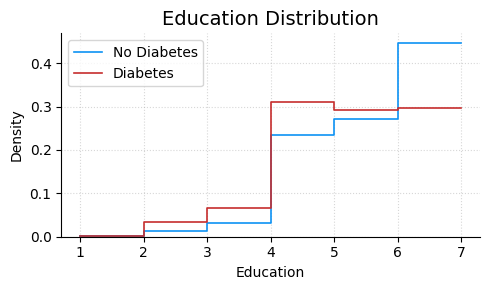

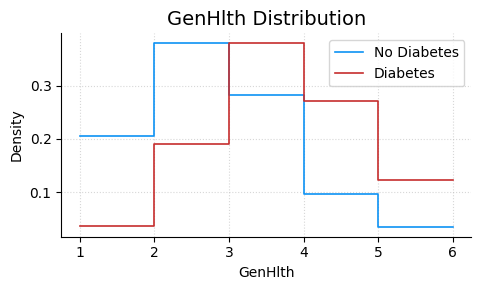

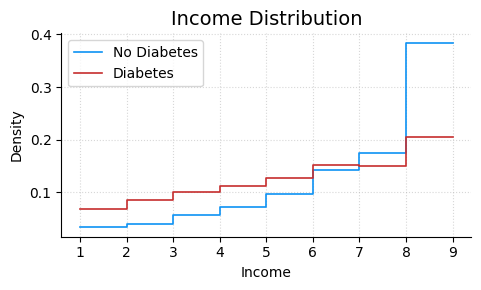

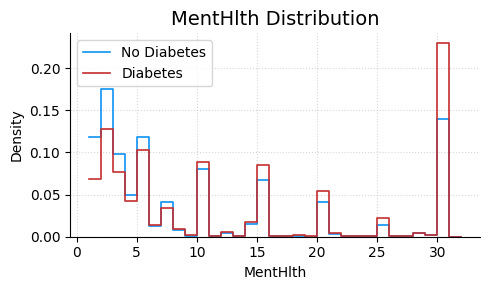

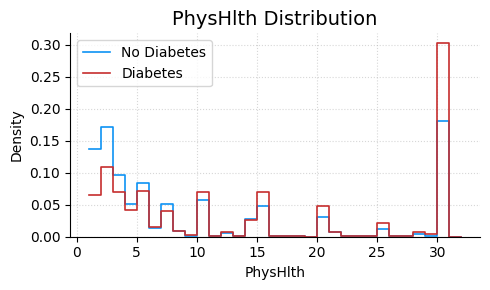

In [48]:
# Define function for creating a histogram for numerical variable

def num_var_line(var):

    # Count the number of unique values
    num_unique_vals = df[var].nunique()

    # Seperate numerical variables by diabetes status
    num_var_no = df[df[target] == 0][var]
    num_var_yes = df[df[target] == 1][var]

    # Create plot space
    plt.figure(figsize=(5, 3))

    # Plot histogram for no diabetes and diabetes
    # while suppressing future warning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        sns.histplot(num_var_no, stat='density',
                     bins=range(1, num_unique_vals+2),
                     label='No Diabetes',
                     color='#0D92F4',
                     linewidth=1.2,
                     element='step',
                     fill=False
                    )
        sns.histplot(num_var_yes, stat='density',
                     bins=range(1, num_unique_vals+2),
                     label='Diabetes',
                     color='#C62E2E',
                     linewidth=1.2,
                     element='step',
                     fill=False
                    )

    # Format the plot
    plt.title(f'{var} Distribution', fontsize=14)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Density', fontsize=10)

    # Remove top and right spines
    plt.gca().spines[['top', 'right']].set_visible(False)

    # Add grid lines and legend
    plt.grid(axis='both', linestyle=':', alpha=0.5)
    plt.legend()

    plt.tight_layout()
    plt.show()

for col in num_col:
    num_var_line(col)

# Check for correlations between variables

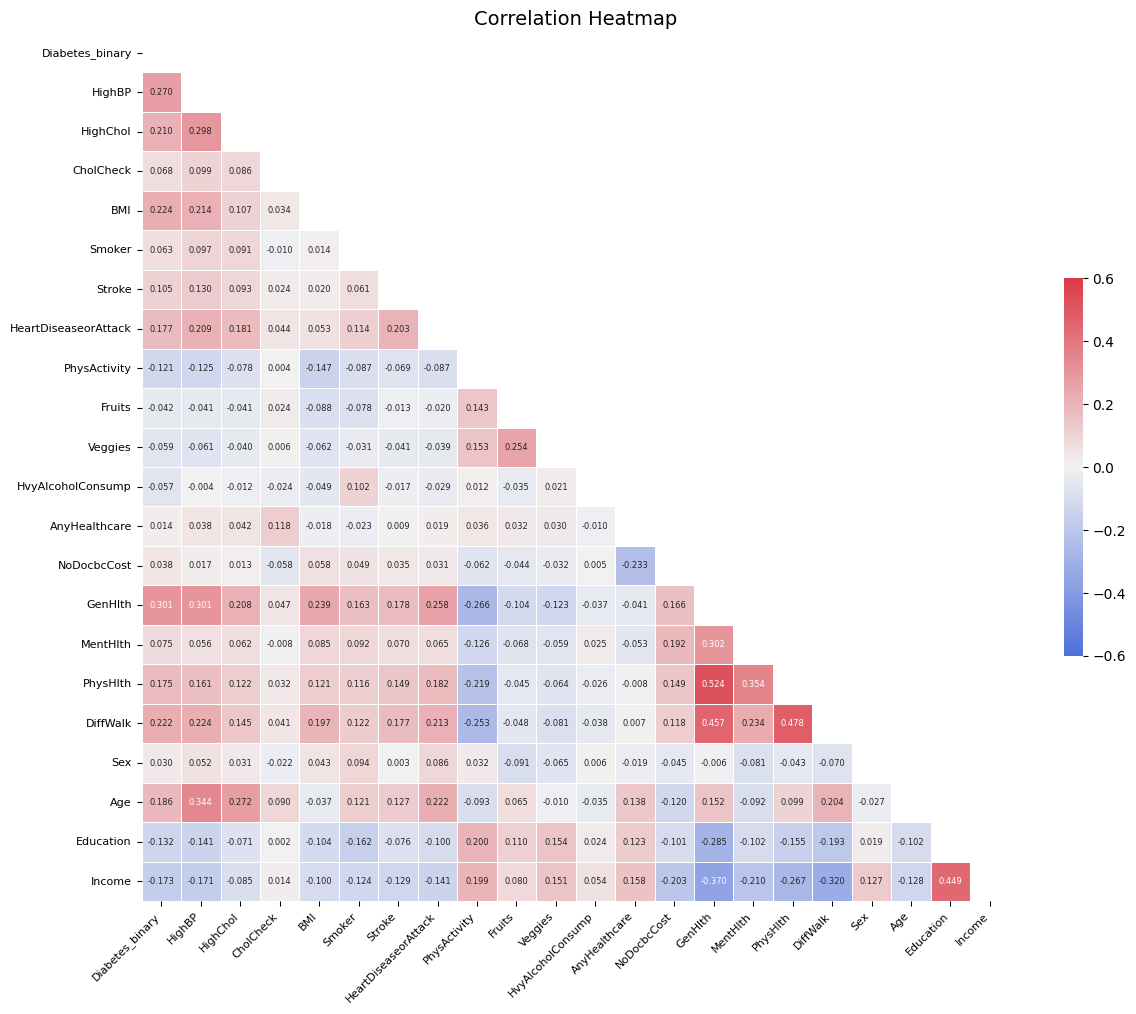

In [49]:

# Generate a correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up plot figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the upper diagonal removed
# and the values displayed in the cells
heatmap = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    annot=True,
    annot_kws={"size": 6},
    fmt='.3f',
    vmax=0.6,
    vmin=-0.6,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.35}
)

# Set title
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14})
ax.tick_params(axis='both', labelsize=8)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right');

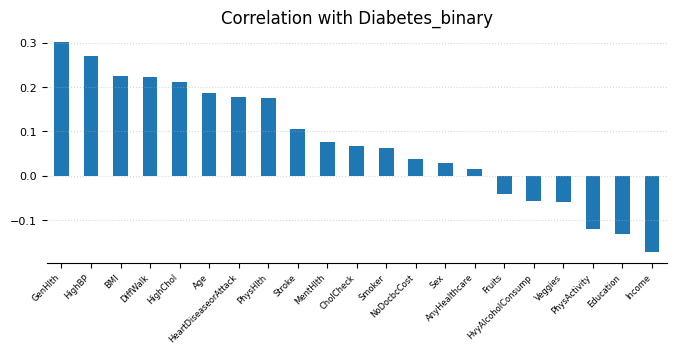

In [50]:
# Correlation with the target variable (Diabetes_binary)

# Create an array of correlation between target variables and others
# sorted in descending order
corr_target = corr[target].drop(target).sort_values(ascending=False)

# Create a bar graph
corr_target_graph = corr_target.plot(kind='bar', figsize=(8, 3))

# Set the title and change the font size of y labels
corr_target_graph.set_title('Correlation with Diabetes_binary', fontsize=12)
corr_target_graph.tick_params(axis='y', labelsize=8)

# Remove the spines of top, left and right
corr_target_graph.spines[['top', 'left', 'right']].set_visible(False)

# Add horizontal grids
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Rotate the x labes
plt.xticks(rotation = 45, ha='right', size=6);

# handle outliers

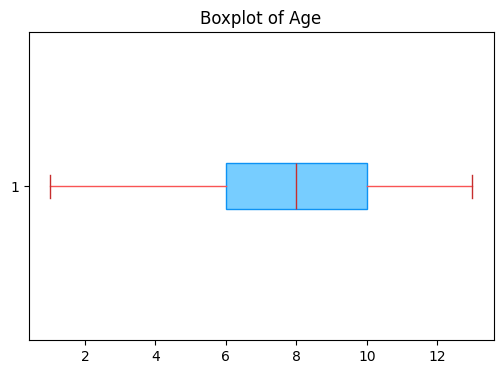

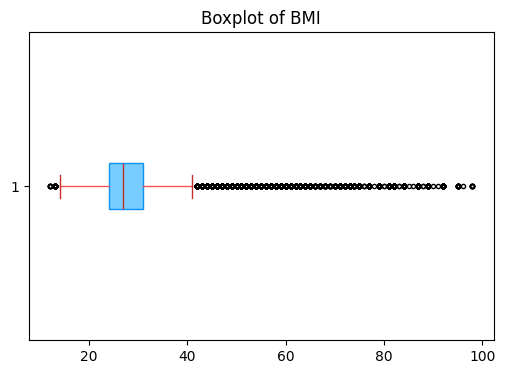

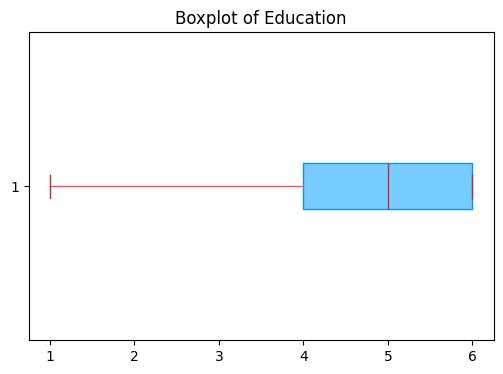

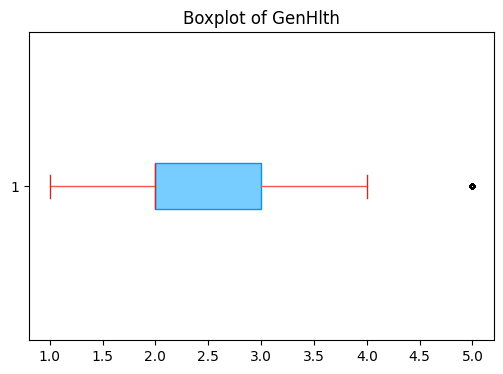

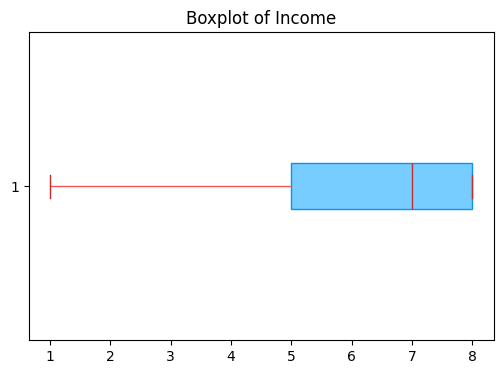

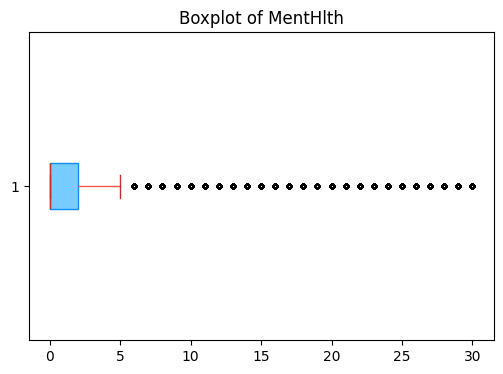

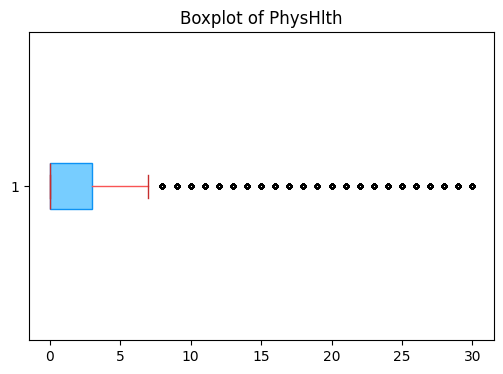

In [51]:
# Define function for creating boxplot
def plot_boxplot(df, col):
    plt.figure(figsize=(6, 4))
    plt.boxplot(
        df[col],
        vert=False,
        patch_artist=True,
        boxprops=dict(facecolor='#77CDFF', color='#0D92F4'),
        medianprops=dict(color='#C62E2E'),
        whiskerprops=dict(color='#F95454'),
        capprops=dict(color='#C62E2E'),
        flierprops=dict(marker='o', color='#536493', markersize=3)
    )
    plt.title(f'Boxplot of {col}')

# Boxplot of numerical variables
for col in num_col:
    plot_boxplot(df, col)

In [52]:
# Define a function to find outliers in a given column
def find_outliers_iqr(df, col, k=1.5):

    # Set the lower quartile and the upper quartile
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Set the lower bound and upper bound
    # based on IQR and parameter k
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Filter only outlier rows
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    return outliers

# Return rows where BMI is an outlier
df_outlier_bmi = find_outliers_iqr(df, 'BMI')
df_outlier_bmi

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
85,1.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,2.0,30.0,1.0,0.0,9.0,6.0,8.0
97,0.0,1.0,0.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,6.0
156,1.0,1.0,1.0,1.0,47.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,6.0,5.0
188,0.0,1.0,0.0,1.0,43.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,7.0,1.0,0.0,10.0,5.0,2.0
201,1.0,1.0,1.0,1.0,55.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,15.0,0.0,0.0,11.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253547,0.0,1.0,1.0,1.0,44.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,4.0,14.0,30.0,0.0,0.0,3.0,6.0,1.0
253557,0.0,1.0,1.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,10.0,20.0,1.0,0.0,6.0,4.0,1.0
253567,0.0,1.0,1.0,1.0,44.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,3.0,0.0,0.0,1.0,1.0,11.0,2.0,1.0
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0


In [53]:
# Explore outlier rows
df_outlier_bmi['BMI'].value_counts().sort_index()


,count
BMI,
12.0,6
13.0,21
42.0,1639
43.0,1500
44.0,1043
45.0,819
46.0,750
47.0,622
48.0,484


Lower Bound: 13.5
Upper Bound: 41.5


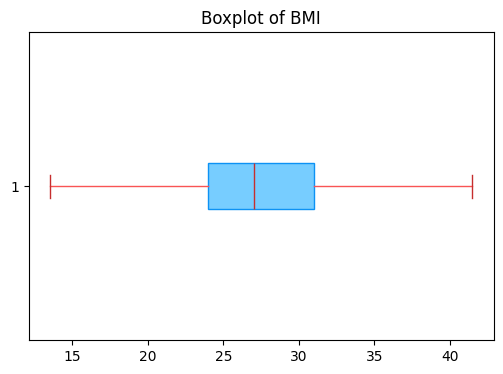

In [54]:
# Define a function to winzorize outliers
def winsorize_iqr(df, col, k=1.5):

    # Set the lower quartile and the upper quartile
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Set the lower bound and upper bound
    # Based on IQR and parameter k
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    print('Lower Bound:', lower_bound)
    print('Upper Bound:', upper_bound)

    # Replace values below/above the bounds with the boundary values
    return df[col].clip(lower=lower_bound, upper=upper_bound)

df['BMI'] = winsorize_iqr(df, 'BMI')

# Boxplot of winsorized BMI
plot_boxplot(df, 'BMI')

# MODEL AND PREDICTION


In [55]:
# get input and target variables
independent_vars = df.drop(target , axis = 1)
dependent_var = df[target]


Baseline Model

In [56]:
#define a function to run the calssifcation model
def classification(model , x=independent_vars , y=dependent_var):

    # Split data for training and testing
    X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1 , random_state= 25)

    # Train the model
    model.fit(X_train , y_train)

    # Predict the labels for the training data
    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train , y_pred_train)

    # Predict the labels for the test data
    y_pred = model.predict(X_test)
    accuracy_test = accuracy_score(y_test , y_pred)

    # Compute additional metrics like Precision , recall , F!-score , and ROC AUC
    precision = precision_score(y_test, y_pred , zero_division = 0)
    recall = recall_score(y_test , y_pred , zero_division = 0)
    f1 = f1_score(y_test , y_pred, zero_division = 0)
    roc_auc = roc_auc_score(y_test , model.predict_proba(X_test)[:, 1])

    # Create a metrics DataFrame
    df_metrics = pd.DataFrame({
        'Training Accuracy': [accuracy_train],
        'Test Accuracy': [accuracy_test],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1],
        'ROC AUC': [roc_auc]
    })

    # convert values to percentages
    for col in ['Training Accuracy',
                'Test Accuracy',
                'Precision',
                'Recall',
                'F1-Score',
                'ROC AUC']:
        df_metrics[col] = df_metrics[col].map(lambda x: f'{x:.2%}')

    # Print the DataFrame
    print(df_metrics)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

    # Normalize by total number
    cm = cm / np.sum(cm)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True,
                cmap="Blues",
                fmt='.2%',
                xticklabels=['No', 'Yes'],
                yticklabels=['No', 'Yes'])
    plt.title('Confusion Matrix (%)')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Return the metrics DataFrame for further use
    return df_metrics



In [57]:
# check the distribution of the training and test set
X, y = independent_vars, dependent_var

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

print('<Training Set Distribution> \n', y_train.value_counts(normalize=True).sort_index().map(lambda x: f'{x:.2%}'))
print()
print('<Test Set Distribution> \n', y_test.value_counts(normalize=True).sort_index().map(lambda x: f'{x:.2%}'))

<Training Set Distribution> 
 Diabetes_binary
0.0    84.25%
1.0    15.75%
Name: proportion, dtype: object

<Test Set Distribution> 
 Diabetes_binary
0.0    84.13%
1.0    15.87%
Name: proportion, dtype: object


# Decision Tree

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.30%        77.85%    31.78%  34.49%   33.08%  60.19%


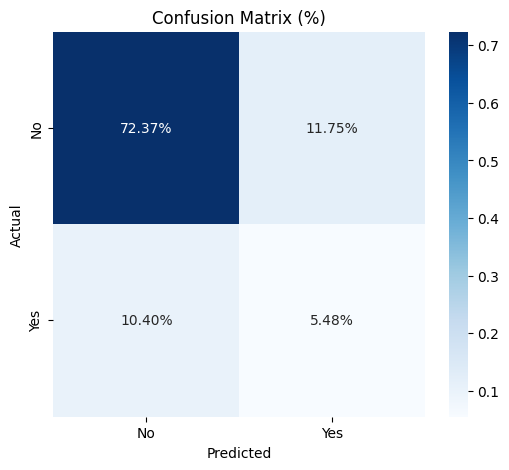

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,99.30%,77.85%,31.78%,34.49%,33.08%,60.19%


In [58]:
# Initialize Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=52)

classification(dt_clf)

# Random Forest

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.29%        84.26%    50.98%  21.33%   30.08%  79.17%


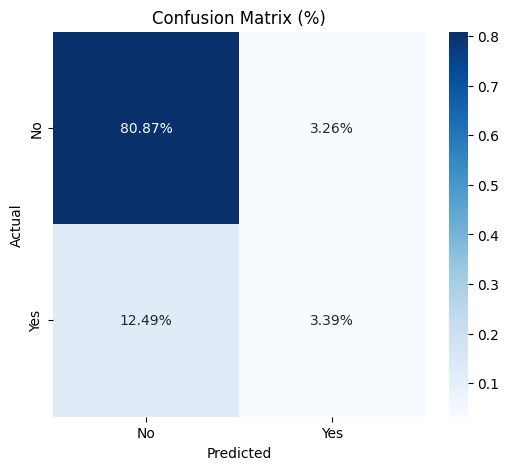

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,99.29%,84.26%,50.98%,21.33%,30.08%,79.17%


In [59]:
# Initialize Random Forest model

rnf_clf = RandomForestClassifier(random_state=52)

classification(rnf_clf)

# AdaBoost

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            84.91%        84.97%    56.83%  22.20%   31.93%  81.40%


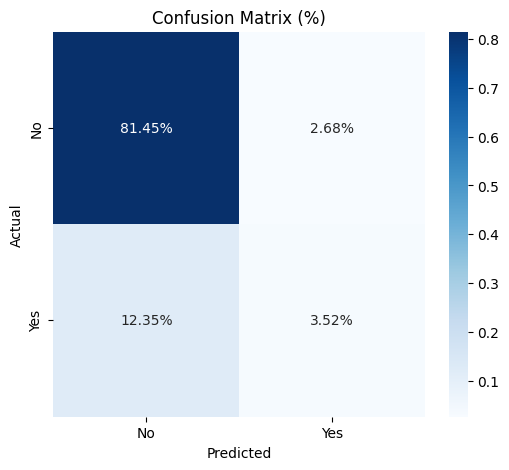

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,84.91%,84.97%,56.83%,22.20%,31.93%,81.40%


In [60]:
# Initialize AdaBoost Classifier

ada_clf = AdaBoostClassifier(random_state = 52)

classification(ada_clf)

# Gradient Boosting

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


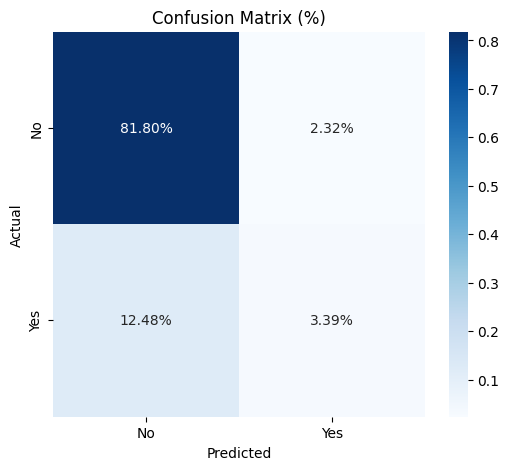

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,85.18%,85.20%,59.38%,21.38%,31.44%,82.38%


In [61]:
gbrt = GradientBoostingClassifier(random_state = 52)

classification(gbrt)

# xgboost

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            86.12%        84.97%    57.61%  20.21%   29.93%  82.08%


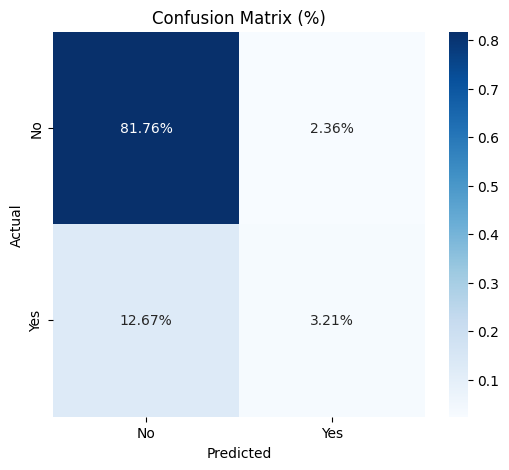

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,86.12%,84.97%,57.61%,20.21%,29.93%,82.08%


In [62]:
# Initialize xgboost Classifier

xgb_clf = XGBClassifier(random_state=52)

classification(xgb_clf)



# Data Resamplimg

In [63]:
# Define a function to run the classification model with sampling
def classification_sampling(model, sampling, X=independent_vars, y=dependent_var):

    # Split data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

    # Define the pipeline with sampling methods
    pipeline = ImbPipeline(
        sampling + [('classifier', model)]
    )

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict the labels for the training data
    y_pred_train = pipeline.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    # Predict the labels for the test data
    y_pred = pipeline.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)

    # Compute additional metrics
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        roc_auc = roc_auc_score(y_test,
                                pipeline.predict_proba(X_test)[:, 1])
    else:
         roc_auc = None

    # Create a DataFrame of the metrics
    df_metrics = pd.DataFrame({
        'Training Accuracy': [accuracy_train],
        'Test Accuracy': [accuracy_test],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1],
        'ROC AUC': [roc_auc]
        }, index=['score'])

    # convert values to percentages
    for col in ['Training Accuracy',
                'Test Accuracy',
                'Precision',
                'Recall',
                'F1-Score',
                'ROC AUC']:
        if df_metrics[col].iloc[0] is not None:
            df_metrics[col] = df_metrics[col].map(lambda x: f'{x:.2%}')
        else:
            df_metrics[col] = 'N/A'

    # Print the DataFrame
    print(df_metrics)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

    # Normalize by total number
    cm = cm / np.sum(cm)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True,
                cmap="Blues",
                fmt='.2%',
                xticklabels=['No', 'Yes'],
                yticklabels=['No', 'Yes'])
    plt.title('Confusion Matrix (%)')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

**RandomOverSampler + RandomUnderSampler**

      Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
score            75.66%        75.34%    36.18%  72.41%   48.25%  82.38%


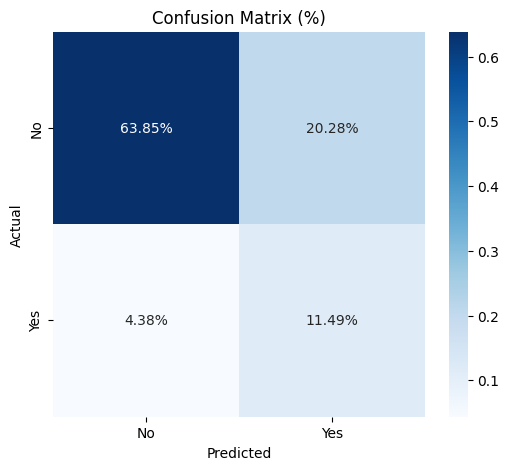

In [64]:
# Initialize Gradient Boosting Classifier
gbrt = GradientBoostingClassifier(random_state=52)

sampling_ros_rus = [
    ('oversample', RandomOverSampler(sampling_strategy=0.5, random_state=25)),
    ('undersample', RandomUnderSampler(sampling_strategy=0.8, random_state=25))
]

classification_sampling(gbrt, sampling_ros_rus)

**SMOTE (Synthetic Minority Over-Sampling Technique)**

      Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
score            83.25%        83.26%    47.01%  42.69%   44.74%  81.63%


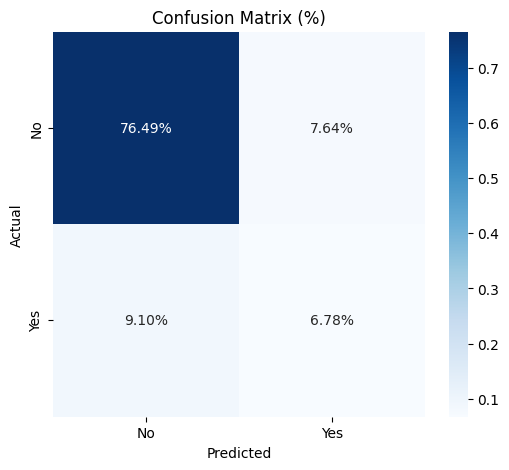

In [65]:


# Initialize Gradient Boosting Classifier
gbrt = GradientBoostingClassifier(random_state=52)

sampling_smote = [
    ('smote', SMOTE(sampling_strategy=1.0, random_state=25))
]

classification_sampling(gbrt, sampling_smote)



Near Miss

      Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
score            45.97%        45.88%    20.23%  81.85%   32.44%  67.41%


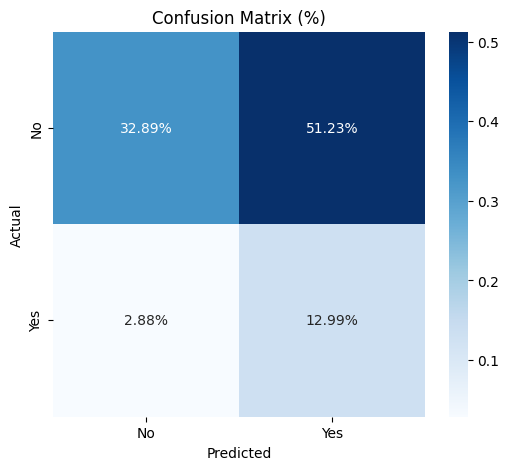

In [66]:
# Initialize Gradient Boosting Classifier
gbrt = GradientBoostingClassifier(random_state=52)

sampling_nearmiss = [
     ('nearmiss', NearMiss(version=1))
]

classification_sampling(gbrt, sampling_nearmiss)



# FEATURE SELECTION


FEATURE IMPORTANCE

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


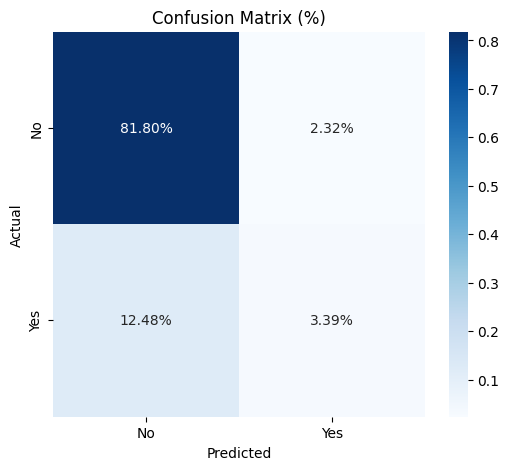

,0
GenHlth,0.299189
HighBP,0.272015
BMI,0.167666
Age,0.081697
HighChol,0.080108
DiffWalk,0.033725
HeartDiseaseorAttack,0.019382
Income,0.015606
HvyAlcoholConsump,0.008672
Sex,0.006881


In [67]:
# Initialize Gradient Boosting Classifier (baseline) and run it
gbrt = GradientBoostingClassifier(random_state=52)
classification(gbrt)

# Extract feature importances from Gradient Boosting Classifier
importances = gbrt.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names)

# sort feature importances and names
feature_importances_sorted = feature_importances.sort_values(ascending=False)
feature_names_sorted = feature_importances_sorted.index

feature_importances_sorted



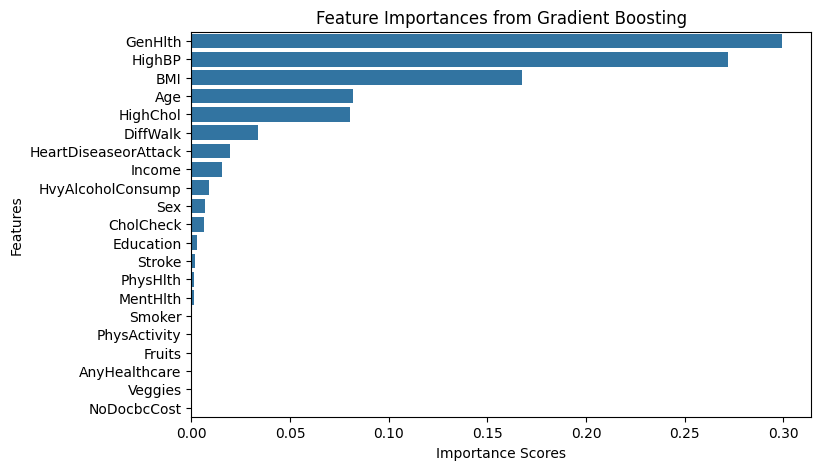

In [68]:
# Visualize the feature importances
plt.figure(figsize=(8, 5))
sns.barplot(
    x=feature_importances_sorted,
    y=feature_names_sorted
)
plt.title('Feature Importances from Gradient Boosting')
plt.xlabel('Importance Scores')
plt.ylabel('Features')
plt.show()



List of Features: ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack', 'Income', 'HvyAlcoholConsump', 'Sex', 'CholCheck', 'Education', 'Stroke', 'PhysHlth', 'MentHlth', 'Smoker', 'PhysActivity', 'Fruits', 'AnyHealthcare', 'Veggies', 'NoDocbcCost']
Number of Features: 21
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


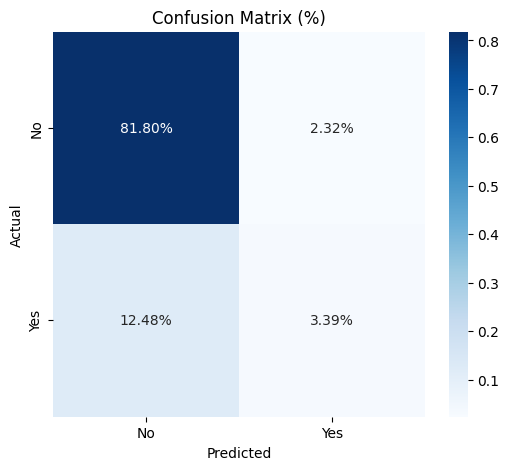

List of Features: ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack', 'Income', 'HvyAlcoholConsump', 'Sex', 'CholCheck', 'Education', 'Stroke', 'PhysHlth', 'MentHlth', 'Smoker', 'PhysActivity', 'Fruits', 'AnyHealthcare']
Number of Features: 19
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


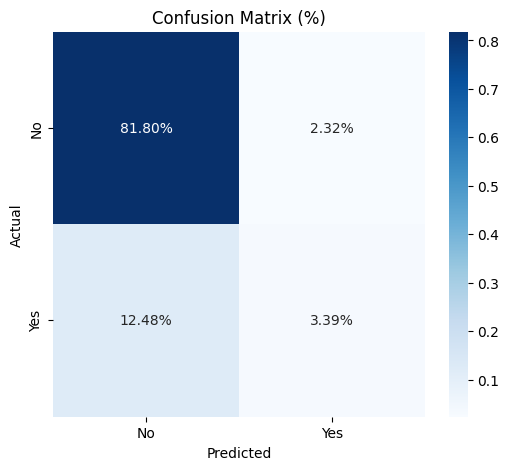

List of Features: ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack', 'Income', 'HvyAlcoholConsump', 'Sex', 'CholCheck', 'Education', 'Stroke', 'PhysHlth', 'MentHlth', 'Smoker', 'PhysActivity']
Number of Features: 17
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


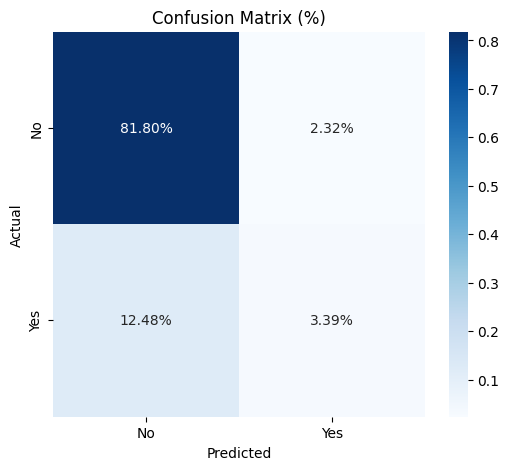

List of Features: ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack', 'Income', 'HvyAlcoholConsump', 'Sex', 'CholCheck', 'Education', 'Stroke', 'PhysHlth', 'MentHlth']
Number of Features: 15
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


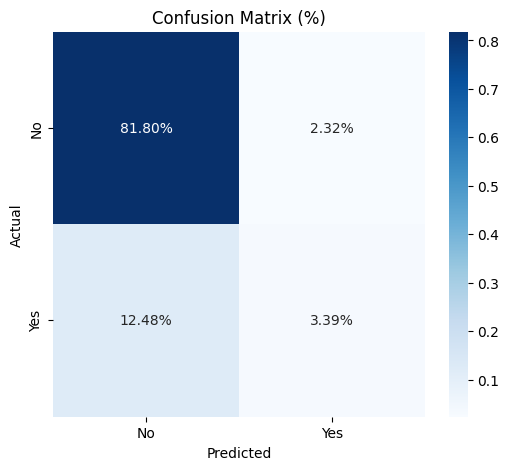

List of Features: ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack', 'Income', 'HvyAlcoholConsump', 'Sex', 'CholCheck', 'Education', 'Stroke']
Number of Features: 13
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


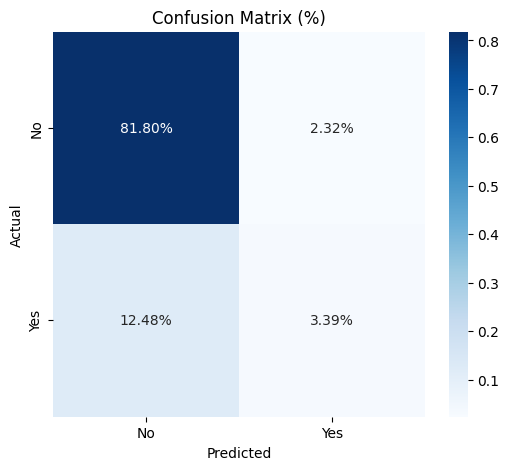

List of Features: ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack', 'Income', 'HvyAlcoholConsump', 'Sex', 'CholCheck']
Number of Features: 11
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


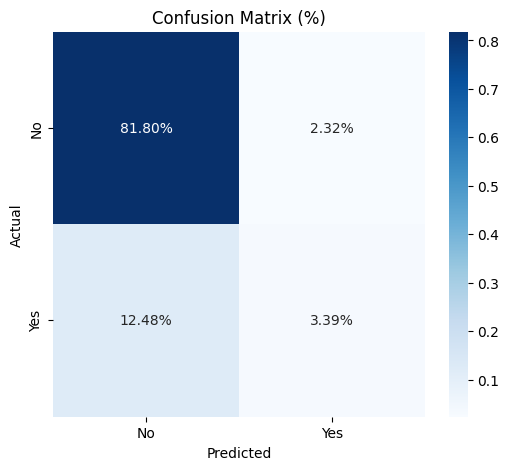

List of Features: ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack', 'Income', 'HvyAlcoholConsump']
Number of Features: 9
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


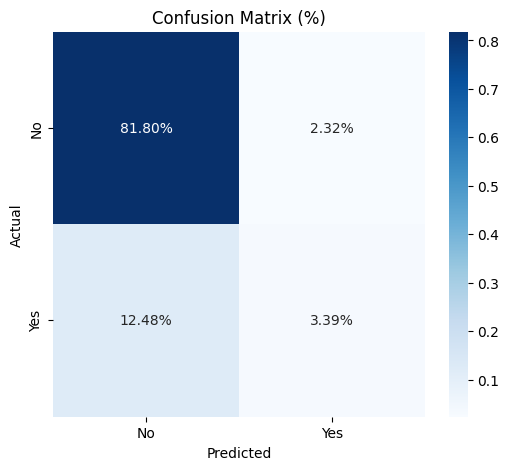

List of Features: ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack']
Number of Features: 7
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


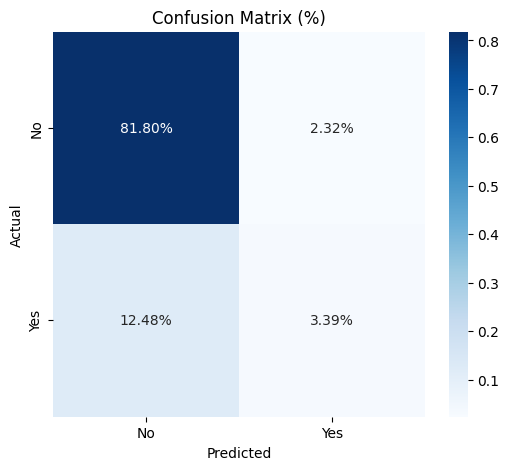

List of Features: ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol']
Number of Features: 5
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


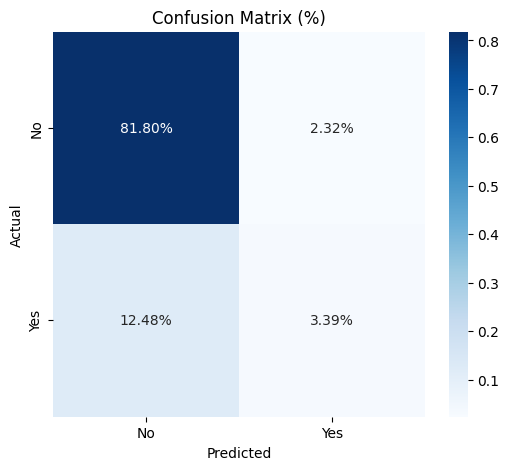

List of Features: ['GenHlth', 'HighBP', 'BMI']
Number of Features: 3
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


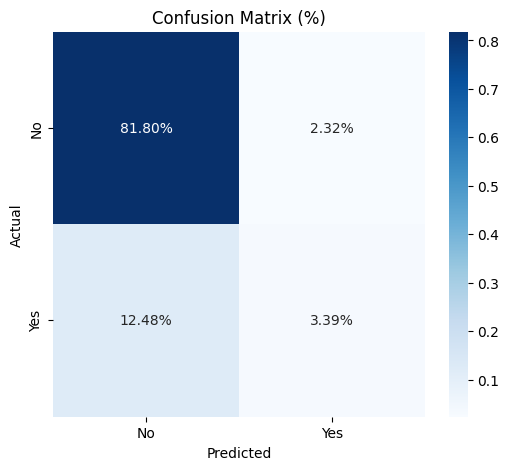

List of Features: ['GenHlth']
Number of Features: 1
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


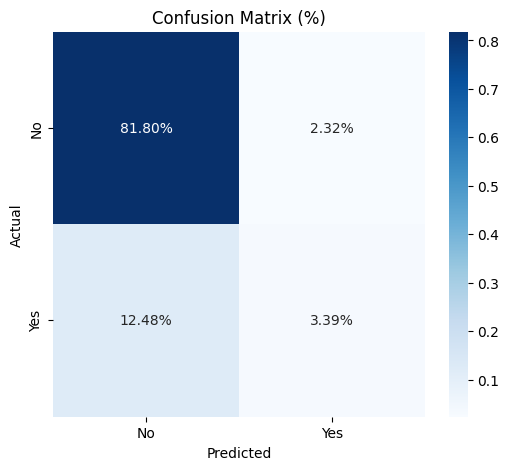

In [69]:
# Set an empty list to collect metrics DataFrame results
results_num_features = []

# Loop through until the number of features reduces to 10
for num_features in range(len(feature_names_sorted), 0, -2):

    # Select the features for analysis
    independent_vars_fi = df[feature_names_sorted[:num_features]]

    print('=' * 30)
    print('List of Features:', list(independent_vars_fi.columns))
    print('Number of Features:', num_features)

    # Initialize Gradient Boosting Classifier in every iteration
    gbrt = GradientBoostingClassifier(random_state=52)

    # Run Gradient Boosting Classifier
    df_metrics_num_features = classification(gbrt, x=independent_vars_fi)

    # Add metrics DataFrame results to the list
    df_metrics_num_features['Number of Features'] = num_features
    results_num_features.append(df_metrics_num_features)


# Combine all results into one DataFrame
df_results_num_features = pd.concat(results_num_features, ignore_index=True)

# Reorder columns
cols = ['Number of Features'] + [col for col in df_results_num_features.columns
                                 if col != 'Number of Features']
df_results_num_features = df_results_num_features[cols]

# Save the DataFrame Results
df_results_num_features.to_excel('Results_Number_of_Features.xlsx', index=False)
df_results_num_features.to_csv('Results_Number_of_Features.csv', index=False)

In [70]:
df_results_num_features

,Number of Features,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,21,85.18%,85.20%,59.38%,21.38%,31.44%,82.38%
1,19,85.18%,85.20%,59.38%,21.38%,31.44%,82.38%
2,17,85.18%,85.20%,59.38%,21.38%,31.44%,82.38%
3,15,85.18%,85.20%,59.38%,21.38%,31.44%,82.38%
4,13,85.18%,85.20%,59.38%,21.38%,31.44%,82.38%
5,11,85.18%,85.20%,59.38%,21.38%,31.44%,82.38%
6,9,85.18%,85.20%,59.38%,21.38%,31.44%,82.38%
7,7,85.18%,85.20%,59.38%,21.38%,31.44%,82.38%
8,5,85.18%,85.20%,59.38%,21.38%,31.44%,82.38%
9,3,85.18%,85.20%,59.38%,21.38%,31.44%,82.38%


# Recursive Feaature Elimination

In [71]:
# Initialize a Gradient Boosting Classifier
gbrt = GradientBoostingClassifier(random_state=52)

# Run RFE using Gradient Boosting Classifier
# select 15 most important features
rfe = RFE(estimator=gbrt, n_features_to_select=15)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]

print('Selected Features:', list(selected_features))

Selected Features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


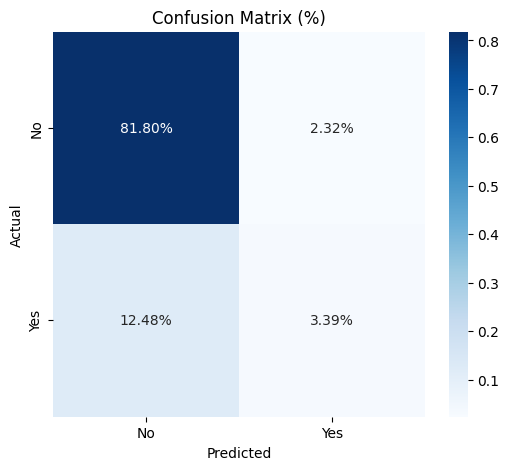

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,85.18%,85.20%,59.38%,21.38%,31.44%,82.38%


In [72]:
independent_vars_selected = df[selected_features]
dependent_var = df[target]

classification(gbrt, x=independent_vars_selected)

# HYPERPARAMETER TUNING

Number of Estimators

Number of estimators: 100
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


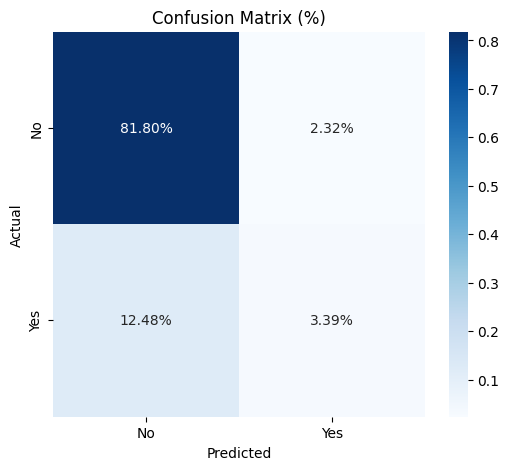

Number of estimators: 200
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.24%        85.19%    59.21%  21.55%   31.60%  82.44%


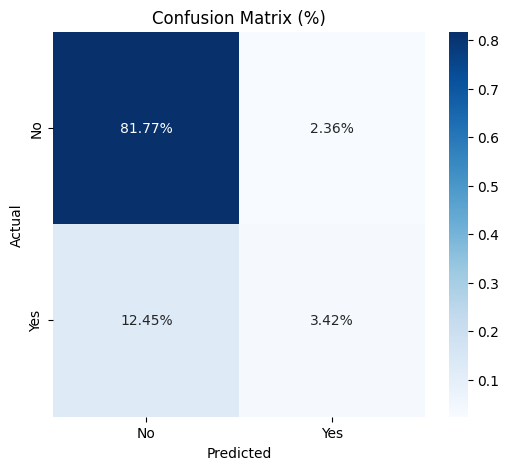

Number of estimators: 300
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.29%        85.17%    59.02%  21.46%   31.47%  82.44%


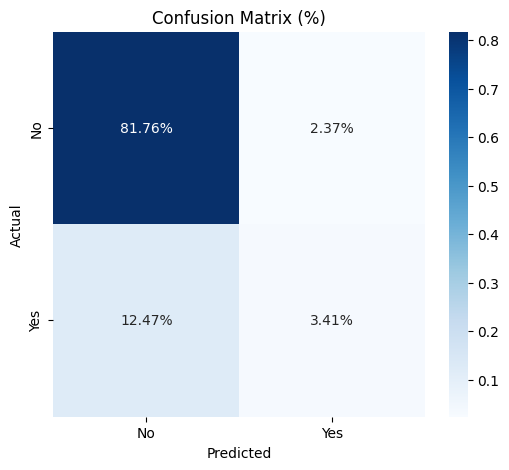

Number of estimators: 500
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.37%        85.15%    59.12%  21.01%   31.00%  82.44%


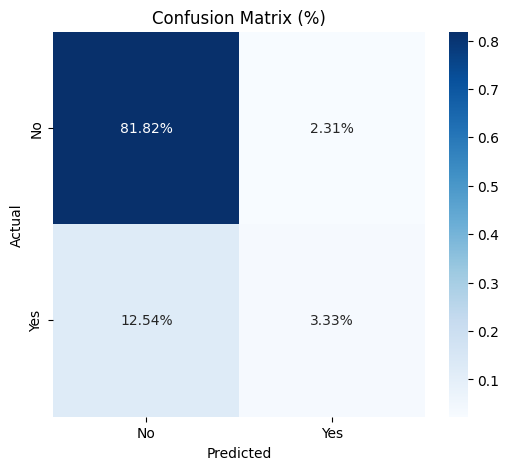

In [73]:
# Set an empty list to collect metrics DataFrame results
results_estimators = []

# Iterate Gradient Boosting model over different numbers of estimators
for num in [100, 200, 300, 500]:
    print('=' * 30)
    print(f'Number of estimators: {num}')

    gbrt_estimators = GradientBoostingClassifier(n_estimators=num, random_state=52)

    # Run the classification function
    df_metrics_estimators = classification(gbrt_estimators)

    # Add metrics DataFrame results to the list
    df_metrics_estimators['Estimators'] = num
    results_estimators.append(df_metrics_estimators)

# Combine all results into one DataFrame
df_results_estimators = pd.concat(results_estimators, ignore_index=True)

# Reorder columns
cols = ['Estimators'] + [col for col in df_results_estimators.columns if col != 'Estimators']
df_results_estimators = df_results_estimators[cols]

# Save the DataFrame Results
df_results_estimators.to_excel('Results_Number_of_Estimators.xlsx', index=False)
df_results_estimators.to_csv('Results_Number_of_Estimators.csv', index=False)



In [74]:
df_results_estimators

,Estimators,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,100,85.18%,85.20%,59.38%,21.38%,31.44%,82.38%
1,200,85.24%,85.19%,59.21%,21.55%,31.60%,82.44%
2,300,85.29%,85.17%,59.02%,21.46%,31.47%,82.44%
3,500,85.37%,85.15%,59.12%,21.01%,31.00%,82.44%


Maximum Depth

Maximum Depth : 3
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.18%        85.20%    59.38%  21.38%   31.44%  82.38%


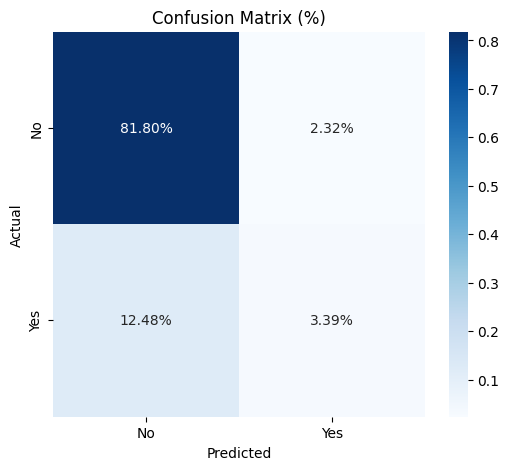

Maximum Depth : 5
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            85.45%        85.15%    59.34%  20.51%   30.49%  82.44%


In [ ]:
# Gradually increase max_depth and run the model
INTERVAL = 2

# Set an empty list to collect metrics DataFrame results
results_max_depth = []

for depth in range(3, 10, INTERVAL):
    print('=' * 30)
    print(f'Maximum Depth : {depth}')

    gbrt_iter = GradientBoostingClassifier(max_depth=depth, random_state=52)

    # Run the classification function with the restricted model
    df_metrics_max_depth = classification(gbrt_iter)

    # Add metrics DataFrame results to the list
    df_metrics_max_depth['Max Depth'] = depth
    results_max_depth.append(df_metrics_max_depth)

# Combine all results into one DataFrame
df_results_max_depth = pd.concat(results_max_depth, ignore_index=True)

# Reorder columns
cols = ['Max Depth'] + [col for col in df_results_max_depth.columns if col != 'Max Depth']
df_results_max_depth = df_results_max_depth[cols]

# Save the DataFrame Results
df_results_max_depth.to_excel('Results_Maximum_Depth_Nodes.xlsx', index=False)
df_results_max_depth.to_csv('Results_Maximum_Depth_Nodes.csv', index=False)



In [ ]:
df_results_max_depth

Learning Rate

In [ ]:
# Set an empty list to collect metrics DataFrame results
results_lr = []

# Iterate Gradient Boosting model over different numbers of learning rates
for lr in [0.01, 0.05, 0.1, 0.2, 1]:
    print('=' * 30)
    print(f'Learning Rate: {lr}')

    gbrt_lr = GradientBoostingClassifier(learning_rate=lr, random_state=52)

    # Run the classification function
    df_metrics_lr = classification(gbrt_lr)

    # Add metrics DataFrame B results to the list
    df_metrics_lr['Learning Rate'] = lr
    results_lr.append(df_metrics_lr)

# Combine all results into one DataFrame
df_results_lr = pd.concat(results_lr, ignore_index=True)

# Reorder columns
cols = ['Learning Rate'] + [col for col in df_results_lr.columns if col != 'Learning Rate']
df_results_lr = df_results_lr[cols]

# Save the DataFrame Results
df_results_lr.to_excel('Results_Learning_Rate.xlsx', index=False)
df_results_lr.to_csv('Results_Learning_Rate.csv', index=False)

In [ ]:
df_results_lr

Grid Search

In [ ]:
# Prepare the data
X, y = independent_vars, dependent_var

# Set the range of number of features
feature_range = range(21, 10, -2)

# Set the parameter distributions for RandomizedSearchCV
param_distributions = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.05, 0.1, 0.2]
}

# Set empty list to store results and summary
results_all_list = []
summary_list = []

# Perform hyperparameter tuning for each number of features
for k in feature_range:

    print('=' * 30)
    print('Number of Features:', k)

    pipeline = SklearnPipeline([
        ('select', SelectKBest(score_func=f_classif, k=k)),  # Linear ANOVA F-test
        ('clf', GradientBoostingClassifier(random_state=52))
    ])

    # Randomized Search instead of Grid Search
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_distributions,
        n_iter=10,               # Number of random parameter combinations to try
        cv=3,                    # 3-fold CV (faster than 5-fold)
        scoring='roc_auc',
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    # Fit the model
    random_search.fit(X, y)

    # Get the best cross-validation score
    best_score = random_search.best_score_

    # Get the best combination of hyperparameters
    best_params = random_search.best_params_

    # Get the best selector step
    best_selector = random_search.best_estimator_.named_steps['select']
    selected_mask = best_selector.get_support()
    selected_features = X.columns[selected_mask].tolist()

    print('Best ROC AUC:', best_score)
    print('Best Params:', best_params)
    print('Selected Features:', selected_features)

    # Save the random search results
    df_results = pd.DataFrame(random_search.cv_results_)
    df_results['num_features'] = k
    df_results['selected_features'] = [selected_features] * len(df_results)
    results_all_list.append(df_results)

    summary_list.append({
        'num_features': k,
        'best_roc_auc': best_score,
        'best_params': best_params,
        'selected_features': selected_features
    })
    pd.DataFrame(summary_list).to_csv("partial_summary.csv" , index=False)
    pd.concat(results_all_list).to_csv("partial_results.csv", index=False)

# Combine results across all feature size
df_results_all = pd.concat(results_all_list, ignore_index=False)

df_results_all = df_results_all[[
    'num_features',
    'mean_test_score',
    'param_clf__n_estimators',
    'param_clf__max_depth',
    'param_clf__learning_rate',
    'selected_features'
]].sort_values(by='mean_test_score', ascending=False)
# Create combination summary table
df_summary = pd.DataFrame(summary_list).sort_values(by='best_roc_auc', ascending=False)

# Save the DataFrame Results
df_results_all.to_excel('Results_Random_Search_All.xlsx', index=False)
df_results_all.to_csv('Results_Random_Search_All.csv', index=False)

df_summary.to_excel('Results_Random_Search_Summary.xlsx', index=False)
df_summary.to_csv('Results_Random_Search_Summary.csv', index=False)


In [ ]:
df_summary

# Prediction

In [ ]:
# Prepare the data
X, y = independent_vars, dependent_var

# Based on Grid Search results:
# Optimal number of Features: 21
# Best Parameters:
#     'clf__n_estimators': 300,
#     'clf__max_depth': 3
#     'clf__learning_rate': 0.1
pipeline = SklearnPipeline([
        ('select', SelectKBest(score_func=f_classif, k=21)), # Linear ANOVA F-test
        ('clf', GradientBoostingClassifier(
            random_state=52,
            n_estimators=300,
            max_depth=3,
            learning_rate=0.1
        ))
    ])

# Fit the model
pipeline.fit(X, y)

# See the selected features and feature scores
selected_mask = pipeline.named_steps['select'].get_support()
selected_features = X.columns[selected_mask].tolist()

scores = pipeline.named_steps['select'].scores_
feature_scores = pd.Series(scores, index=X.columns)

print('<Selected Features and Feature Scores>')
print(feature_scores.sort_values(ascending=False))

In [ ]:
# Prepare the input (example)
# The first 3 rows:
# - All lowest values (ideal case)
# - All highest values/ones (worst case)
# - Mixed extremes (e.g., youngest age, highest BMI, worst health, etc.)
# The next 12 rows are randomly generated examples

input_values = {
    'HighBP':               [0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1],
    'HighChol':             [0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1],
    'CholCheck':            [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
    'BMI':                  [12, 98, 45, 41, 24, 29, 36, 18, 26, 31, 40, 22, 35, 28, 33],
    'Smoker':               [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
    'Stroke':               [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
    'HeartDiseaseorAttack': [0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
    'PhysActivity':         [1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1],
    'Fruits':               [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0],
    'Veggies':              [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0],
    'HvyAlcoholConsump':    [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
    'AnyHealthcare':        [1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
    'NoDocbcCost':          [0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    'GenHlth':              [1, 5, 1, 5, 2, 3, 4, 1, 2, 4, 5, 3, 2, 1, 4],
    'MentHlth':             [0, 30, 15, 25, 3, 5, 12, 0, 30, 10, 7, 0, 8, 2, 15],
    'PhysHlth':             [0, 30, 30, 30, 2, 7, 15, 3, 1, 8, 20, 2, 6, 10, 12],
    'DiffWalk':             [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
    'Sex':                  [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1],
    'Age':                  [1, 13, 13, 9, 4, 7, 2, 5, 8, 3, 11, 10, 6, 12, 13],
    'Education':            [6, 1, 1, 2, 6, 3, 4, 1, 5, 2, 6, 4, 3, 1, 6],
    'Income':               [8, 1, 8, 1, 8, 3, 6, 2, 5, 7, 4, 8, 3, 2, 6]
}

df_input_values = pd.DataFrame(input_values)

In [ ]:
# Set the THRESHOLD
THRESHOLD = 0.2
print(f'Threshold for Diabetes Probability: {THRESHOLD:.0%}')

# Make prediction
probability = pipeline.predict_proba(df_input_values)
prediction = (probability[:, 1] > THRESHOLD).astype(int)

# Set DataFrame
df_prediction = df_input_values.copy()

# Add prediction results
df_prediction['Prediction'] = pd.Series(prediction).map(
    {1: 'Diabetes', 0: 'No Diabetes'}
)
df_prediction['Probability'] = pd.Series(probability[:, 1]).apply(
    lambda x: f'{x:.2%}'
)

# Move column 'Prediction' and 'Probability' to the beginning
cols = ['Prediction', 'Probability'] + [col for col in df_prediction.columns
                                        if col not in ['Prediction', 'Probability']]

df_prediction = df_prediction[cols]


df_prediction.to_excel('Results_Prediction.xlsx', index=False)
df_prediction.to_csv('Results_Prediction.csv', index=False)

In [ ]:

df_prediction